
####**Uploading file to cloud**



In [ ]:
from google.colab import files
upload = files.upload()

Saving Tahoe_Salt Quarterly.xlsx to Tahoe_Salt Quarterly.xlsx


####**Import pandas and numpy library**

In [ ]:
import pandas as pd  #pandas is a library mainly for data analysis and manipulation
import numpy as np   #numpy is a shortform of numerical python mainly for scientific programming

####**Read data from '*Tahoe_Salt Quarterly.xlsx*' into dataframe**

In [ ]:
data = pd.read_excel(r'Tahoe_Salt Quarterly.xlsx', index_col = 0) 

In [ ]:
data.head() # checking for header of dataframe

,Quarter,Period_t,Demand_Dt
Year,,,
1,2,1,8000
1,3,2,13000
1,4,3,23000
2,1,4,34000
2,2,5,10000


In [ ]:
#select data from all rows [:] and starting from second columnn at index = 1 [1:] to drop 'Quarter' column
data = data.iloc[:, 1:] 
data

,Period_t,Demand_Dt
Year,,
1,1,8000
1,2,13000
1,3,23000
2,4,34000
2,5,10000
2,6,18000
2,7,23000
3,8,38000
3,9,12000


In [ ]:
data = data.set_index('Period_t') #set index to 'Period_t' to get a good plot
data

,Demand_Dt
Period_t,
1,8000
2,13000
3,23000
4,34000
5,10000
6,18000
7,23000
8,38000
9,12000


####**Plot data using *.plot()* function from *matplotlib* library to understand demand pattern and seasonality**

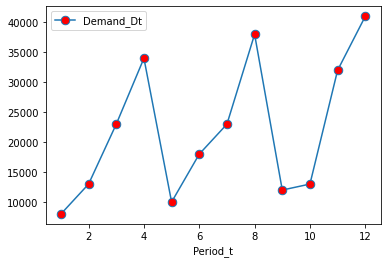

In [ ]:
data.plot(marker = '.', mfc = 'red', ms = 17) #plotting data with '.' marker of red color and size 17

####**Importing seasonal decompost function**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

####**Decompose data into observation, trend, seasonal and residual using *seasonal_decompose()* function**

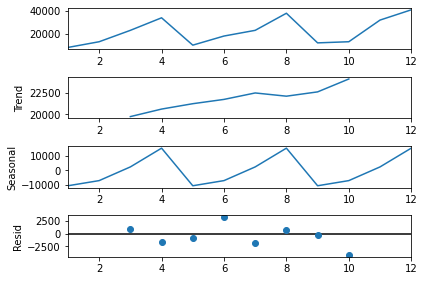

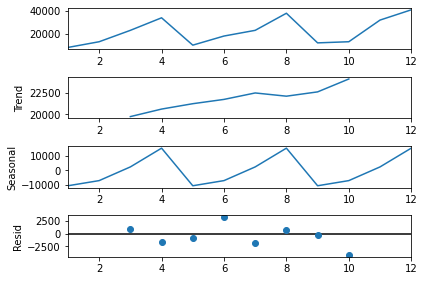

In [ ]:
decompose_data = seasonal_decompose (data, period = 4)
decompose_data.plot()

###**Visualizing seasonal pattern**

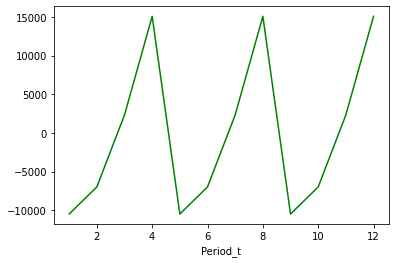

In [ ]:
seasonality = decompose_data.seasonal
seasonality.plot(color = 'green')

####**Create a new column '*Deseasonalized_data*' to store trend values**

In [ ]:
data['Deseasonalized_data'] = decompose_data.trend
data

,Demand_Dt,Deseasonalized_data
Period_t,,
1,8000,NaN
2,13000,NaN
3,23000,19750.0
4,34000,20625.0
5,10000,21250.0
6,18000,21750.0
7,23000,22500.0
8,38000,22125.0
9,12000,22625.0


In [ ]:
data = data.fillna(0) #fill missing null values with 0

In [ ]:
data = data.reset_index() # resetting index of the dataframe

In [ ]:
data

,Period_t,Demand_Dt,Deseasonalized_data
0,1,8000,0.0
1,2,13000,0.0
2,3,23000,19750.0
3,4,34000,20625.0
4,5,10000,21250.0
5,6,18000,21750.0
6,7,23000,22500.0
7,8,38000,22125.0
8,9,12000,22625.0
9,10,13000,24125.0


In [ ]:
#discard rows where 'Deseasonalized_data' is null
data_x = data.loc[2:9,:]
data_x

,Period_t,Demand_Dt,Deseasonalized_data
2,3,23000,19750.0
3,4,34000,20625.0
4,5,10000,21250.0
5,6,18000,21750.0
6,7,23000,22500.0
7,8,38000,22125.0
8,9,12000,22625.0
9,10,13000,24125.0


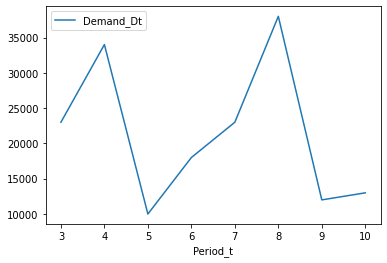

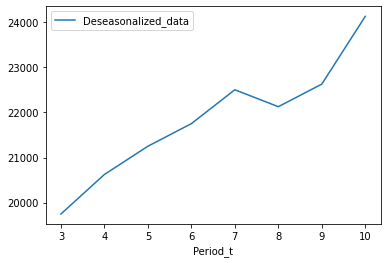

In [ ]:
data_x.plot('Period_t','Demand_Dt')
data_x.plot('Period_t','Deseasonalized_data')

####**Import *LinearRegression* library from *sklearn***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#create var *x* to store array of values from *'Deseasonalized_data'* in 2 dimension
x = np.array(data_x['Period_t']).reshape((-1,1))
#create var *y* to store array of values from *'Period_t'*
y = np.array(data_x['Deseasonalized_data'])

In [ ]:
x, y #Display the contents of array x, y

(array([[ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([19750., 20625., 21250., 21750., 22500., 22125., 22625., 24125.]))

In [ ]:
model = LinearRegression()  #define model as LinearRegression

In [ ]:
#fit x, y values into LineareRegression model
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict(x)

array([20010.41666667, 20534.22619048, 21058.03571429, 21581.8452381 ,
       22105.6547619 , 22629.46428571, 23153.27380952, 23677.08333333])

#### **Storing intercept value into *intercept***

In [ ]:
intercept = model.intercept_
intercept

18438.988095238095

#### **Storing coefficient value into *coef***

In [ ]:
coef = model.coef_
coef

array([523.80952381])

In [ ]:
model.score(x, y)

0.9178889975405222

### **Finding regression values using statsmodels library**

In [ ]:
import statsmodels.api as sm

In [ ]:
x = data_x['Deseasonalized_data']
y = data_x['Period_t']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Period_t   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     67.07
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           0.000179
Time:                        08:38:51   Log-Likelihood:                -7.9857
No. Observations:                   8   AIC:                             19.97
Df Residuals:                       6   BIC:                             20.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -31.7775    

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data

,Period_t,Demand_Dt,Deseasonalized_data
0,1,8000,0.0
1,2,13000,0.0
2,3,23000,19750.0
3,4,34000,20625.0
4,5,10000,21250.0
5,6,18000,21750.0
6,7,23000,22500.0
7,8,38000,22125.0
8,9,12000,22625.0
9,10,13000,24125.0


####**Create a column 'Dt' to store Deseasonalized_data with trend**

In [ ]:
data ['Dt'] = intercept + coef*data['Period_t']
data

,Period_t,Demand_Dt,Deseasonalized_data,Dt
0,1,8000,0.0,18962.797619
1,2,13000,0.0,19486.607143
2,3,23000,19750.0,20010.416667
3,4,34000,20625.0,20534.226190
4,5,10000,21250.0,21058.035714
5,6,18000,21750.0,21581.845238
6,7,23000,22500.0,22105.654762
7,8,38000,22125.0,22629.464286
8,9,12000,22625.0,23153.273810
9,10,13000,24125.0,23677.083333


#### **Create new column 'SF' to store calculated values of Seasonal Factor**

In [ ]:
data['SF'] = data['Dt']/data['Demand_Dt']
data

,Period_t,Demand_Dt,Deseasonalized_data,Dt,SF
0,1,8000,0.0,18962.797619,2.370350
1,2,13000,0.0,19486.607143,1.498970
2,3,23000,19750.0,20010.416667,0.870018
3,4,34000,20625.0,20534.226190,0.603948
4,5,10000,21250.0,21058.035714,2.105804
5,6,18000,21750.0,21581.845238,1.198991
6,7,23000,22500.0,22105.654762,0.961115
7,8,38000,22125.0,22629.464286,0.595512
8,9,12000,22625.0,23153.273810,1.929439
9,10,13000,24125.0,23677.083333,1.821314
